# Classification methods on diabetes

This workbook is to try different classification methods on diabetes dataset (predict wheather on not a patient has diabetes based on other measures)

Data is from Pima Indians Diabetes Dataset that can be downloaded from Kaggle https://www.kaggle.com/uciml/pima-indians-diabetes-database

Workbook contains: [ k-Nearest Neighbors](#hd1), [confusion matrix](#hd2), [logistic regression for binary classification](#hd3), [ROC](#hd4), [parameter tuning](#hd5), [Pipeline](#hd6), [handling missing data](#hd7), [scaling](#hd8), [ensemble methods](#hd9), [bagging](#hd10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint #to generate random numbers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [2]:
#load dataset from csv

df = pd.read_csv(r'datasets\diabetes.csv', header=0)
#df.head(5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#if normal disttribution

#shapiro-wilk test for normality
#null hypothesis: data was drawn from a normal distribution

from scipy.stats import shapiro
stat, p = shapiro(df['BloodPressure'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.819, p=0.0000


# k-Nearest Neighbors <a id='hd1'></a>

In [6]:
#k-Nearest Neighbors
#create arrays for the features and target
y = df['Outcome'].values
x = df.drop('Outcome', axis=1).values

In [7]:
#split into train & test
#stratify argument - to make sure labels are distributed in test & train as they are in the whole dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2, stratify = y)

In [8]:
#create k-NN clasifier with n neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

In [9]:
#fit the classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [10]:
#predict labels of test data
y_pred = knn.predict(x_test)

In [11]:
#accuracy
knn.score(x_test, y_test)

0.7619047619047619

In [12]:
#plotting train & test accuracy for different neighbor values

#arrays to store accuracies
neighbors = np.arange(1, 10)
train_accy = np.empty(len(neighbors)) 
test_accy = np.empty(len(neighbors))

for i, k in enumerate (neighbors):
    #k-NN calssifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #fit the classifier
    knn.fit(x_train, y_train)
    
    #accuracy on train
    train_accy[i] = knn.score(x_train, y_train)
    
    #accuracy on test
    test_accy[i] = knn.score(x_test, y_test)

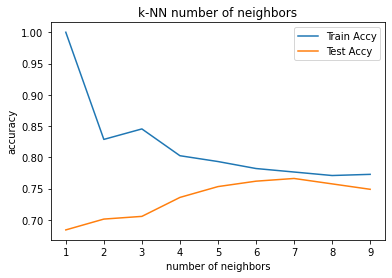

In [13]:
plt.title('k-NN number of neighbors')
plt.plot(neighbors, train_accy, label = 'Train Accy')
plt.plot(neighbors, test_accy, label = 'Test Accy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()

### confusion matrix <a id='hd2'></a>

In [14]:
#confusion matrix to understand performance of the classifier

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  10]
 [ 45  36]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       150
           1       0.78      0.44      0.57        81

    accuracy                           0.76       231
   macro avg       0.77      0.69      0.70       231
weighted avg       0.77      0.76      0.74       231



# logistic regression for binary classification<a id='hd3'></a>

In [15]:
#classifier
#log_reg = LogisticRegression()
#increase the number of iterations to help the algorithm to converge
log_reg = LogisticRegression(solver='lbfgs', max_iter=400)

#fit to train data
log_reg.fit(x_train, y_train)

#predict labels of test data
y_pred = log_reg.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[139  11]
 [ 41  40]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       150
           1       0.78      0.49      0.61        81

    accuracy                           0.77       231
   macro avg       0.78      0.71      0.72       231
weighted avg       0.78      0.77      0.76       231



### ROC<a id='hd4'></a>

In [16]:
#ROC curve

#predict_proba - probability of a given sample being in a particular class
y_pred_prob = log_reg.predict_proba(x_test)[:,1]

#generate ROC values
#fpr - false positive rate
#tpr - true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

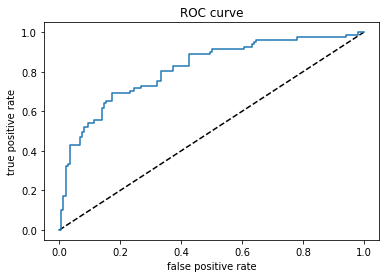

In [17]:
#plot ROC curve
#fpr on x-axis & tpr on y-axis

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [18]:
#calculate AUC area under ROC curve
#on test set & predicted probabilities
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: {}'.format(auc))

AUC: 0.8153086419753086


In [19]:
#AUC after 5-fold cross-validation
#cross-validation
cv_auc = cross_val_score(log_reg, x, y, cv=5,
                        scoring = 'roc_auc')
print(cv_auc)

[0.81240741 0.80777778 0.82574074 0.87283019 0.84471698]


# parameter tuning<a id='hd5'></a>

In [20]:
#Grid search cv
#logistic regression has parameter C that controls the inverse of the regularization strength

#gridsearch to find optimal c in hyperparameter space, set up grid as a dict where keys are hyperparameter names + values are list of values to choose
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

#grid search cv, logistic regression classifier from the model + grid to tune over + no of folds
log_reg_cv = GridSearchCV(log_reg, param_grid, cv = 5)

#fit grid object to data, the actual grid search
log_reg_cv.fit(x, y)

#show best parameter & best score by accessing the attributes
print(log_reg_cv.best_params_)
print(log_reg_cv.best_score_)

{'C': 0.006105402296585327}
0.7734742381801205


In [21]:
#Randomized seach
#not all hyperparameter values are tested

#tune parameters of Decision Tree
#specify parameters & distributions to sample from
param_distributions = {'max_features': randint(1,9), 
              'max_depth': [3, None],
              'min_samples_leaf': randint(1,9),
              'criterion': ['gini', 'entropy']}

#Decision Tree classifier
decision_tree = DecisionTreeClassifier()

#randomized search cv
decision_tree_cv = RandomizedSearchCV(decision_tree, param_distributions, cv = 5)

#fit to data
decision_tree_cv.fit(x, y)

#show best parameter & best score
print(decision_tree_cv.best_params_)
print(decision_tree_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 4}
0.7396316102198455


In [22]:
#same as above but with evaluation on unseen data

#logistic regression grid search c
param_grid = {'C': c_space}

#if introduce more parameters:
#param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

log_reg_cv = GridSearchCV(log_reg, param_grid, cv = 5)

#fit to train data only
log_reg_cv.fit(x_train, y_train)

#show best parameter & best score by accessing the attributes
print(log_reg_cv.best_params_)
print(log_reg_cv.best_score_)

{'C': 0.4393970560760795}
0.780373831775701


# Pipeline<a id='hd6'></a>

### handling missing data<a id='hd7'></a>

In [23]:
#some metrics don't have accurate data, ex. 0
#replace 0 to NaN where applicable
df_nan = df
df_nan.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [24]:
df_nan.Insulin.replace(0, np.nan, inplace = True)
df_nan.SkinThickness.replace(0, np.nan, inplace = True)
df_nan.BMI.replace(0, np.nan, inplace = True)

#if change '?' in df to NaN
#df[df =='?'] = np.nan

df_nan.shape
print(df_nan.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [25]:
df_dropna = df_nan.dropna()
df_dropna.shape

(393, 9)

### handling missing data within a pipeline

In [26]:
#imputing missing data
#set up imputer, impute missing data with most frequent value in columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

#SVC classifier
svc = SVC()

#set up required steps of the pipeline
steps = [('imputation', imputer), 
        ('SVC', svc)]

#create the pipeline
pipeline = Pipeline(steps)

In [27]:
#train-test split
#fit pipeline to train data
pipeline.fit(x_train, y_train)

#predict on test data
y_pred = pipeline.predict(x_test)

#show accuracy & classification report
print(pipeline.score(x_test, y_test))
print(classification_report(y_test, y_pred))

0.7489177489177489
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       155
           1       0.71      0.39      0.51        76

    accuracy                           0.75       231
   macro avg       0.74      0.66      0.67       231
weighted avg       0.74      0.75      0.73       231



### scaling<a id='hd8'></a>

In [28]:
#scale the features

x_scale = scale(x)
print(np.mean(x))
print(np.std(x))
print(np.mean(x_scale))
print(np.std(x_scale))

44.98579117838542
58.37297131925462
8.86154575644819e-17
1.0


In [29]:
#scaling in the pipeline

#steps, scaler as a step
steps = [('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())]

#pipeline
pipeline = Pipeline(steps)

#fit pipeline to train data
knn_scale = pipeline.fit(x_train, y_train)

#compare scale & unscaled
print(knn_scale.score(x_test, y_test))
print(knn.score(x_test, y_test))

0.7359307359307359
0.7922077922077922


In [30]:
#scaling & hyperparameter tuning in a pipeline
steps = [('scaler', StandardScaler()), 
        ('SVC', SVC())]

pipeline = Pipeline(steps)

#set up hyperparameter space
#pattern: 'step_name__parameter_name'
#parameter C & gamma from step SVC:
parameters = {'SVC__C': [1, 10, 100], 
             'SVC__gamma': [0.1, 0.01]}

#train test split
#grid search cv, default for cv is 3
cv = GridSearchCV(pipeline, param_grid = parameters)

#fit to train data
cv.fit(x_train, y_train)

#predict test
y_pred = cv.predict(x_test)

#accuracy
print(cv.score(x_test, y_test))
#classification report
print(classification_report(y_test, y_pred))
#tuned parameters
cv.best_params_

0.7619047619047619
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       155
           1       0.71      0.47      0.57        76

    accuracy                           0.76       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



{'SVC__C': 1, 'SVC__gamma': 0.01}

# Ensemble methods<a id='hd9'></a>

In [31]:
#voting
#compare classifiers and choose the best one

#individual models
knn
log_reg
decision_tree

#create & fit voting, specify list of str + estomator
voting = VotingClassifier(estimators = [
    ('knn', knn),
    ('logistic_regression', log_reg),
    ('decision_tree', decision_tree)
])

#fit to train data
voting.fit(x_train, y_train)

#predict
y_pred = voting.predict(x_test)

#F-1 score of voting classifier
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5736434108527132
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       155
           1       0.70      0.49      0.57        76

    accuracy                           0.76       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



In [32]:
#averaging
#combine models using averaging

#list of str + estomator tuples
estimators = [('knn', knn),
              ('logistic_regression', log_reg),
              ('decision_tree', decision_tree)]

#averaging classifier
averaging = VotingClassifier(estimators, voting = 'soft')

averaging.fit(x_train, y_train)

#evaluate performance, show combined accuracy
y_pred_avg = averaging.predict(x_test)
print(accuracy_score(y_test, y_pred_avg))

0.7489177489177489


In [33]:
#comparision of hard vs. soft voting
estimators = [('knn', knn),
              ('logistic_regression', log_reg),
              ('decision_tree', decision_tree)]

#voting classifier
voting = VotingClassifier(estimators)
voting.fit(x_train, y_train)

#averaging classifier
averaging = VotingClassifier(estimators, voting = 'soft')
averaging.fit(x_train, y_train)

#evaluate performance
acc_voting = accuracy_score(y_test, voting.predict(x_test))
acc_averaging = accuracy_score(y_test, averaging.predict(x_test))

print('voting: {:.3f}, averaging: {:.3f}'.format(acc_voting, acc_averaging))

voting: 0.758, averaging: 0.723


# Bagging<a id='hd10'></a>

In [34]:
#compare restricted & unrestricted decision tree
#identify weak model

#unrestricted decision tree
tree_unrestricted = DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split = 7, random_state = 221)
tree_unrestricted.fit (x_train, y_train)

tree_unrestricted_pred = tree_unrestricted.predict(x_test)

print('Unrestricted Decision Tree')
print(confusion_matrix(y_test, tree_unrestricted_pred))
print(f1_score(y_test, tree_unrestricted_pred))

#restricted decision tree
tree_restricted = DecisionTreeClassifier(max_depth = 4, max_features = 2, random_state = 221)
tree_restricted.fit (x_train, y_train)

tree_restricted_pred = tree_restricted.predict(x_test)

print('\nRestricted Decision Tree')
print(confusion_matrix(y_test, tree_restricted_pred))
print(f1_score(y_test, tree_restricted_pred))

#restricted decision tree performes worse

Unrestricted Decision Tree
[[123  32]
 [ 37  39]]
0.5306122448979592

Restricted Decision Tree
[[138  17]
 [ 46  30]]
0.48780487804878053


In [35]:
y_df = df['Outcome']
x_df = df.drop('Outcome', axis=1)

#ValueError: Input contains NaN, infinity or a value too large for dtype('float32')
y_df = y_df.fillna(y_df.mean())
x_df = x_df.fillna(x_df.mean())


x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 2, stratify = y)

In [36]:
#custom step by step, check how samples are drawn
#weak classifier to be trained on a sample train set drawn with replacement

#take a sample
x_train_sample = x_df_train.sample(replace=True, frac = 1.0, random_state = 21)
y_train_sample = y_df_train.loc[x_train_sample.index]

#weak decision tree classifier
tree = DecisionTreeClassifier(max_depth = 4, max_features = 2, random_state = 221)

#fit
tree.fit(x_train_sample, y_train_sample)

DecisionTreeClassifier(max_depth=4, max_features=2, random_state=221)

In [37]:
#bagging

#base estimator, weak model
tree = DecisionTreeClassifier(max_depth = 4)

#build bagging classifier, base estimator - week model that will be built for each sample
bag = BaggingClassifier(base_estimator = tree, 
                        n_estimators = 100, 
                        #turn on option to use out-of-bag score
                        oob_score = True,
                        random_state = 221)

bag.fit(x_df_train, y_df_train)

y_pred_bag = bag.predict(x_df_test)

#show scores
print('out-of-bag score: {:.4}'.format(bag.oob_score_))
print('accuracy: {:.4}'.format( accuracy_score(y_df_test, y_pred_bag)))
print('f1 score: {:.4}'.format(f1_score(y_df_test, y_pred_bag)))

out-of-bag score: 0.7598
accuracy: 0.7619
f1 score: 0.6154


In [38]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
#bagging
#adjust hyperparameters
#try balanced logistic regression - when target has a high class imbalance

#balanced logistic regressor
log_reg = LogisticRegression(class_weight = 'balanced', random_state = 21)
#log_reg = LogisticRegression(class_weight = 'balanced', solver='lbfgs', max_iter=400)

#bagging classifier
bag = BaggingClassifier(base_estimator = log_reg,
                        n_estimators = 200,
                        #oob_score = True, #oob available only when bootstrap true
                        #max no of features for each estimate
                        max_features = 5,
                        #% maximum samples
                        max_samples = 0.65,
                        #bootstrap to indicate samples drawn without replacement
                        bootstrap = False, 
                        random_state = 221)

bag.fit(x_df_train, y_df_train)

#show scores
y_pred_bag = bag.predict(x_df_test)

print('accuracy: {:.4}'.format( accuracy_score(y_df_test, y_pred_bag)))
print('f1 score: {:.4}'.format(f1_score(y_df_test, y_pred_bag)))
print(confusion_matrix(y_df_test, y_pred_bag))

accuracy: 0.7532
f1 score: 0.6503
[[121  29]
 [ 28  53]]
